<a href="https://colab.research.google.com/github/marihatabassum/Python_Data_Analysis_Projects/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use the data to complete the following tasks:

    1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
    2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
    3. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
    4. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
    5. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame.

In [2]:
df=pd.read_csv("/content/drive/MyDrive/FreeCodeCamp Courses/data analysis with python projects/fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [5]:
df.isna().any()

,0
date,False
value,False


In [6]:
# Convert the 'Date_Column' to datetime objects
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [7]:
# Create a new 'month' column
df['month']=df['date'].dt.month
# Create a new 'day' column
df['day']=df['date'].dt.day
df

,date,value,month,day
0,2016-05-09,1201,5,9
1,2016-05-10,2329,5,10
2,2016-05-11,1716,5,11
3,2016-05-12,10539,5,12
4,2016-05-13,6933,5,13
...,...,...,...,...
1299,2019-11-29,171584,11,29
1300,2019-11-30,141161,11,30
1301,2019-12-01,142918,12,1
1302,2019-12-02,220144,12,2


In [8]:
#Q1
df=df.set_index("date")
df

,value,month,day
date,,,
2016-05-09,1201,5,9
2016-05-10,2329,5,10
2016-05-11,1716,5,11
2016-05-12,10539,5,12
2016-05-13,6933,5,13
...,...,...,...
2019-11-29,171584,11,29
2019-11-30,141161,11,30
2019-12-01,142918,12,1


In [9]:
#clean the data by filtering days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
(2.5/100)* 1304
upper_bound=df['value'].quantile(0.975)
upper_bound


np.float64(177613.075)

In [10]:
lower_bound=df['value'].quantile(0.025)
lower_bound

np.float64(17876.4)

In [11]:
top_2_5_per_df=df[df['value']>=upper_bound]
top_2_5_per_df

,value,month,day
date,,,
2018-10-14,184018,10,14
2018-10-16,177647,10,16
2019-06-17,1173655,6,17
2019-06-18,1166225,6,18
2019-07-10,207841,7,10
2019-08-06,337325,8,6
2019-08-07,341595,8,7
2019-10-16,185784,10,16
2019-10-21,208036,10,21


In [12]:
# To get only the bottom 2.5%:
bottom_2_5_percent = df[df['value'] <= lower_bound]
bottom_2_5_percent

,value,month,day
date,,,
2016-05-09,1201,5,9
2016-05-10,2329,5,10
2016-05-11,1716,5,11
2016-05-12,10539,5,12
2016-05-13,6933,5,13
2016-05-14,3127,5,14
2016-05-15,2927,5,15
2016-05-16,2591,5,16
2016-05-17,3403,5,17


In [13]:
# Filter for top and bottom 2.5%
filtered_df = df[(df['value'] <= lower_bound) | (df['value'] >= upper_bound)]
filtered_df

,value,month,day
date,,,
2016-05-09,1201,5,9
2016-05-10,2329,5,10
2016-05-11,1716,5,11
2016-05-12,10539,5,12
2016-05-13,6933,5,13
...,...,...,...
2019-11-25,219608,11,25
2019-11-26,220590,11,26
2019-11-27,208223,11,27


Text(0.5, 1.0, 'Line Plot')

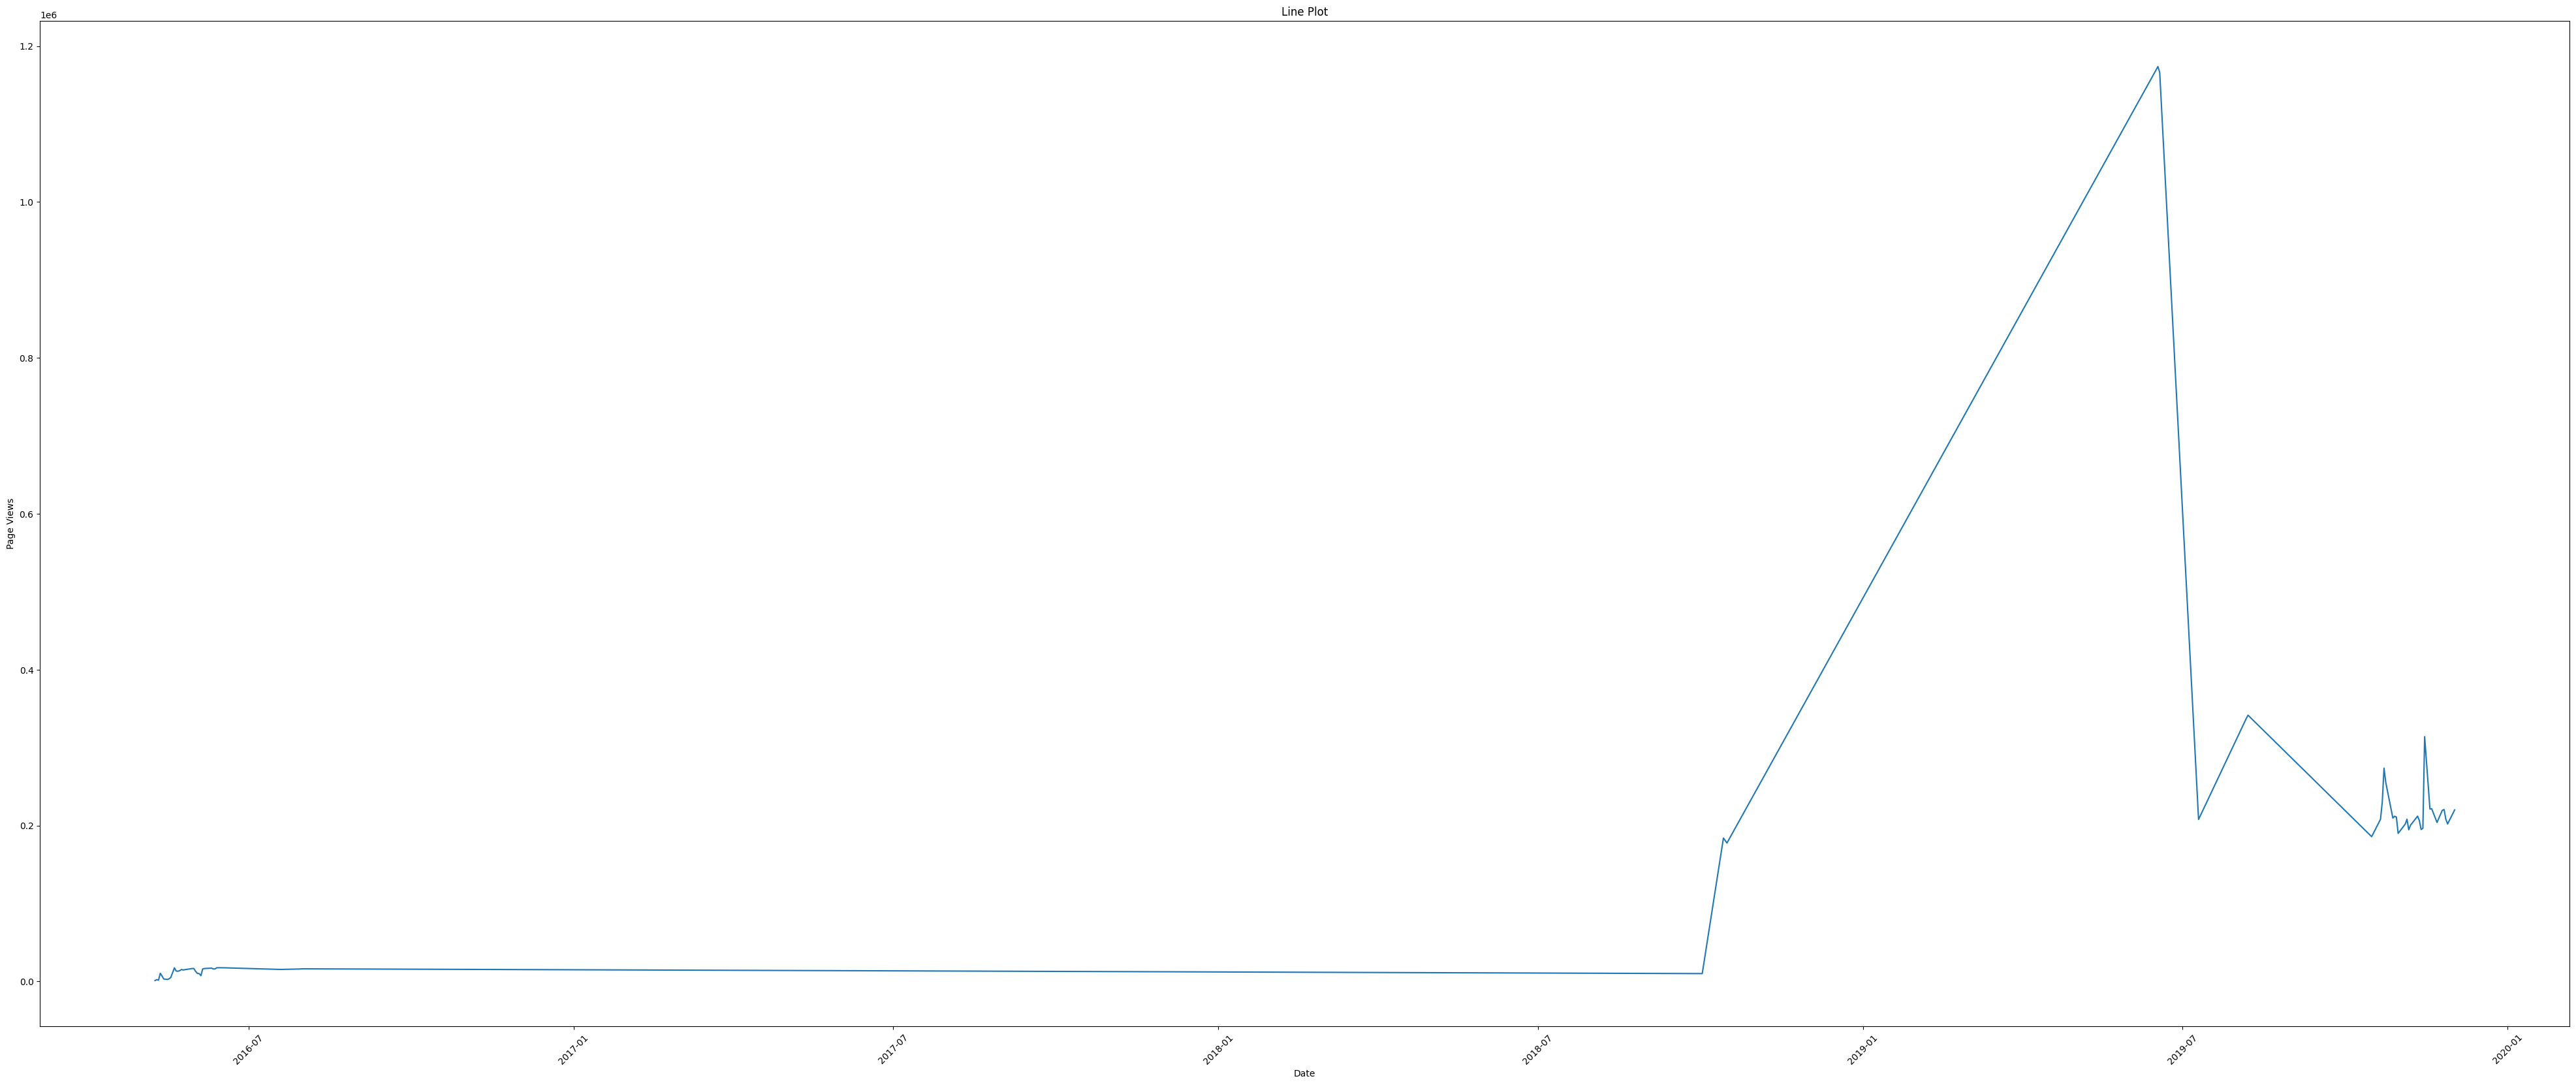

In [14]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
#The label on the x axis should be Date and the label on the y axis should be Page Views.

fig=plt.figure(figsize=(50, 20))
plt.plot(filtered_df.index, filtered_df.value)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.xticks(rotation=45)
plt.title("Line Plot")

In [ ]:
fig.savefig("line plot.png", dpi=500)

In [ ]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
#It should show average daily page views for each month grouped by year.
#The legend should show month labels and have a title of Months.
#On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

df['year']=df.index.year
df['month_name']=df.index.month_name()
df

In [ ]:
avg_daily_pageviews=df.groupby(['year', 'month_name'])['value'].mean()
avg_daily_pageviews
#avg_daily_pageviews=df.groupby(['year', 'month'])['value'].mean().unstack(level='month')

In [ ]:
avg_daily_pageviews_unstacked = avg_daily_pageviews.unstack(level='month_name')
avg_daily_pageviews_unstacked

In [ ]:
fig, ax=plt.subplots(figsize=(15, 12))
avg_daily_pageviews_unstacked.plot(kind="bar", ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Average Page Views')
ax.set_title('Average daily pageviews groupedby month and year!')
ax.legend(title='Months')
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig("bar plot.png", dpi=500)

In [ ]:
#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time.
#The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
#Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.
#The boilerplate includes commands to prepare the data.
sns.set(style='whitegrid')
fig, axes=plt.subplots(1, 2, figsize=(20, 15))

sns.boxplot(x='year', y='value', data=df, ax=axes[0])
axes[0].set_title("Year-wise Box Plot(Trend)")
axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.boxplot(x='month_name', y='value', data=df, ax=axes[1], color='lightcoral', hue='month')
axes[1].yaxis.get_major_formatter().set_scientific(False)

axes[1].set_title("Month-wise Box Plot (Seasonality)")

plt.ylim(0, 350000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import calendar
month_order=[calendar.month_name[i] for i in range(1, 13)]
month_order

In [ ]:
df['month_name']=pd.Categorical(df['month_name'], categories=month_order, ordered=True)
df.sort_values('month_name')
df.info()
df

In [ ]:
sns.set(style='whitegrid')
fig, axes=plt.subplots(1, 2, figsize=(20, 15))

sns.boxplot(x='year', y='value', data=df, ax=axes[0])
axes[0].set_title("Year-wise Box Plot(Trend)")
axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.boxplot(x='month_name', y='value', data=df, ax=axes[1], color='lightcoral', hue='month')
axes[1].yaxis.get_major_formatter().set_scientific(False)

axes[1].set_title("Month-wise Box Plot (Seasonality)")

plt.ylim(0, 350000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig("box plot.png", dpi=500)